<h4>Introduction</h4>
The dataset is based on information derived from US 1990 census and  was gotten from Kaggle Data Repository <u>https://www.kaggle.com/camnugent/california-housing-prices.</u>This python notebook applies statistical analysis for the prediction of house prices in different regions in California.
<p><h4>Data set description</h4>
The dataset contains 9 continuous and 1 categorical variable. They include;
<ul>
    <li>Longitude: Measures how far west a house is located</li>
    <li>Latitude:  Measures how far north a house is located</li>
    <li>House median age: Age of houses</li>
    <li>Total rooms: To number of rooms within a block.</li>
    <li>Total bedrooms: Total bedroom within a block.</li>
    <li>Population: Total number of people living in a block</li>
    <li>Households: Number of households in a block</li>
    <li>Median income: Median income for household measured in 10,000 US dollars</li>
    <li>Median house value measured in US dollars</li>
    <li>Ocean proximity: Location close to the sea</li><p/>


<h3>Import data</h3>

In [1]:
#import pandas and numpy
import pandas as pd
import numpy as np

In [2]:
#Read CSV file
df_hs=pd.read_csv('C:\\Users\\OLUBUKOLA OJAGBEMI\\Desktop\\big data assignment\\housing.csv')


<h4>View data characteristics.<h4/>

In [3]:
df_hs.head(5) # check top 5 data
df_hs.dtypes #to check the data type
df_hs.info() #to check the other information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<p>The dataset contains 20640 entries, 9 continous varaibles and 1 Categorical variable<p/>

<h4>Check for missing data and count<h4/>

In [4]:
#Use a for loop to scan through for missing data and value_counts() to count numbwer of true or false values
missing_data=df_hs.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())

longitude
False    20640
Name: longitude, dtype: int64
latitude
False    20640
Name: latitude, dtype: int64
housing_median_age
False    20640
Name: housing_median_age, dtype: int64
total_rooms
False    20640
Name: total_rooms, dtype: int64
total_bedrooms
False    20433
True       207
Name: total_bedrooms, dtype: int64
population
False    20640
Name: population, dtype: int64
households
False    20640
Name: households, dtype: int64
median_income
False    20640
Name: median_income, dtype: int64
median_house_value
False    20640
Name: median_house_value, dtype: int64
ocean_proximity
False    20640
Name: ocean_proximity, dtype: int64


"True" stands for missing value, while "False" stands for not missing value.<p>Total bedroom has 207 missing data. This will be replaced with the average number of bedrooms.
<p>Run descriptive statistics to obtain the mean number of bedroom, then replace missing data</p>

In [5]:
#describe() for descriptive statistics
df_hs.describe()



longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

<h4>Replace missing data with mean <h4/>

In [6]:
total_bedrooms_mean= df_hs['total_bedrooms'].astype(float).mean(axis=0) #Calculate the mean of the column
df_hs['total_bedrooms'].fillna(total_bedrooms_mean, inplace= True) #replace missing values using fillna()



<h5>Add column of median income in Usd, then drop old column<h5/>
 

<p>The income is reported in per 10000 US dollars hence to get the actual value multiply by 10000 then drop the old column<p/>

In [7]:
df_hs['median_income_usd']= (df_hs.median_income*10000)
df_hs.drop('median_income', inplace=True, axis=1)
df_hs

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_house_value ocean_proximity  \
0           322.0       126.0            452600.0        NEAR BAY   
1          2401.0      1138.0            358500.0        NEAR BAY   
2           496.0       177.0            352100.0        NEAR BAY   
3           558.0       219.0            341300.0        NEAR BAY   
4           565.0       259.0            342200.0        NEAR BAY   
...           ...         ...                 ...             ...   
20635       845.0       330.0             78100.0          INLAND   
20636       356.0       114.0             77100.0          INLAND   
20637      1007.0       433.0             92300.0          INLAND   
20638       741.0       349.0             84700.0          INLAND   
20639      1387.0       530.0             89400.0          INLAND   

       median_income_usd  
0                83252.0  
1                83014.0  
2                72574.0  
3                56431.0  
4                38462.0  
...                  ...  
20635            15603.0  
20636            25568.0  
20637            17000.0  
20638            18672.0  
20639            23886.0  

[20640 rows x 10 columns]

<h4>Exploratory analysis with visualization<h4/>

<h5>Histogram showing distribution of Independent Variables<h5/>

In [8]:
import matplotlib.pyplot as plt #import matplotlib library
%matplotlib inline
import seaborn as sns           #import seaborn library
sns.set()


C:\Users\OLUBUKOLA OJAGBEMI\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\OLUBUKOLA OJAGBEMI\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\OLUBUKOLA OJAGBEMI\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\OLUBUKOLA OJAGBEM

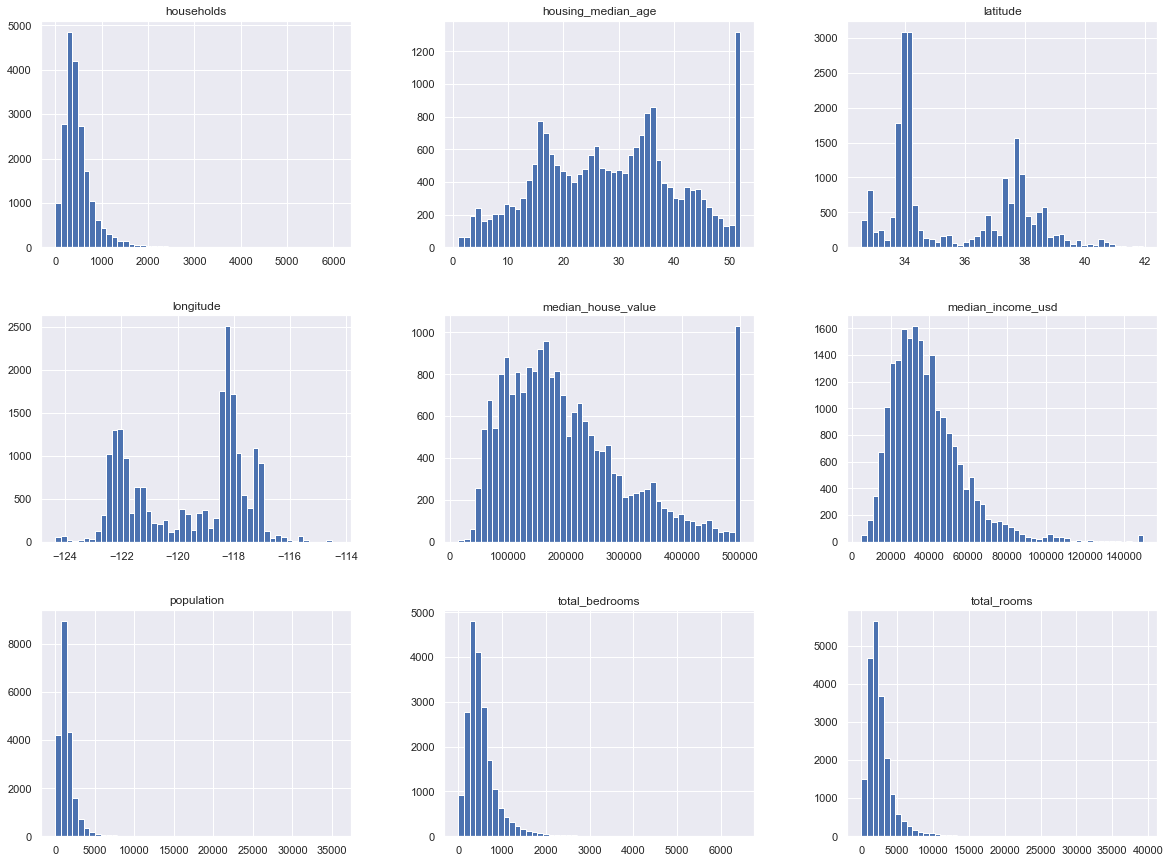

In [9]:
#df_hs.hist(['housing_median_age','total_rooms','total_bedrooms','population','households','median_income'])
df_hs.hist(bins=50, figsize=(20,15))
plt.show()

<h5> Histogram showing distribution of Median house value <h5/>

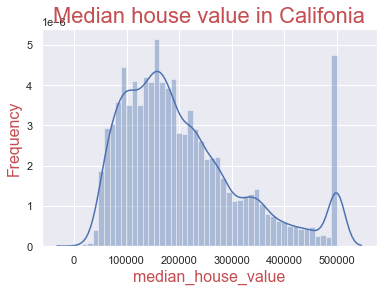

In [10]:
plt.title('Median house value in Califonia', fontsize = 22, color='r') 
plt.ylabel('Frequency', fontsize = 16, color='r') 
plt.xlabel('Median house value', fontsize = 16, color='r') 
sns.distplot(df_hs['median_house_value'])

<p>The distribution plot shows the price of houses is not normally distributed but skewed to the right (Positive skew).The mean house value is about \$206,855 however they are some extreme outlier and the highest house price being  about \$500,00.<p/>

<p>Bar chart showing the number of houses based on proximity to the ocean<p/>

C:\Users\OLUBUKOLA OJAGBEMI\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 6.799999999999979, 'Ocean proximity')

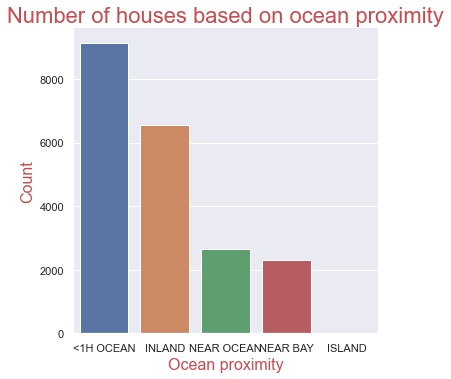

In [11]:
sns.factorplot('ocean_proximity', data= df_hs, kind= 'count', order=df_hs.ocean_proximity.value_counts().index)
#use factorplot to plot bar chart and order to sort descending.
plt.title('Number of houses based on ocean proximity', fontsize = 22, color='r') 
plt.ylabel('Count', fontsize = 16, color='r') 
plt.xlabel('Ocean proximity', fontsize = 16, color='r')


In [12]:
df_hs['ocean_proximity'].value_counts()  #show the frequency of of houses based on location

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<p>From the above chart, it can be seen that, Island houses are the fewest(5) while houses 1hr away from the ocean are the most common(9136)<p/>

<h5> Boxplot showing the relationship between Ocean proximity and the Median house value<h5/> 

Text(0.5, 0, 'Ocean proximity')

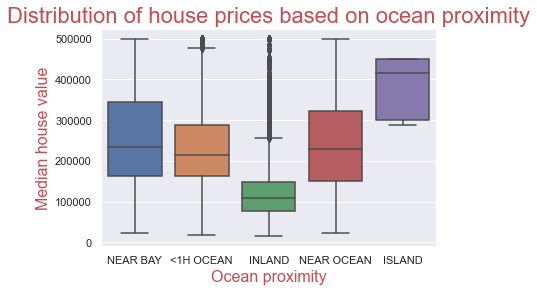

In [13]:
sns.boxplot(x='ocean_proximity', y='median_house_value', data= df_hs)
plt.title('Distribution of house prices based on ocean proximity', fontsize = 22, color='r') 
plt.ylabel('Median house value', fontsize = 16, color='r') 
plt.xlabel('Ocean proximity', fontsize = 16, color='r')

<p>On the average, island houses are the most expensive as shown above, as they have the highest mean. However houses  near bay and near the ocean have the highest values. Although inland houses are the cheapest on the average, some extreme outliers cost as much as houses near the bay and near the ocean.<p/>

<h5>Geographic map to show Population distribution based on Longitude and Latitude<h5/> 

C:\Users\OLUBUKOLA OJAGBEMI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\OLUBUKOLA OJAGBEMI\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


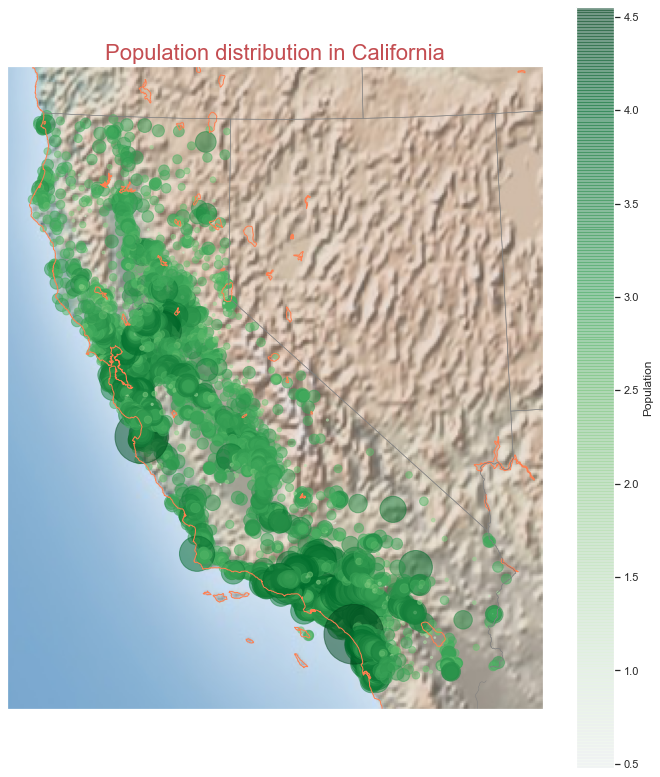

In [14]:
from mpl_toolkits.basemap import Basemap  #import basemap library
lat=df_hs['latitude'].values              #assign variable name to latitude values
lon=df_hs['longitude'].values             #assign variable name to longitude values
population=df_hs['population'].values     #assign variable name to longitude values
fig=plt.figure(figsize=(12,14))              #Indicate size of map
mapping=Basemap(projection='lcc', resolution= 'h', lat_0=37.5,lon_0=-119, width=1E6, height=1.2E6) #assign map attributes
mapping.shadedrelief() #shade relief area
mapping.drawcoastlines(color='coral') #draw coastline color
mapping.drawstates(color='gray')    #draw state color
mapping.scatter(lon,lat,latlon=True, c=np.log10(population), s=(population/10), cmap='Greens', alpha=0.5) # draw scatter plot within map
plt.title('Population distribution in California', fontsize = 22, color='r') #Title of map
plt.colorbar(label='Population', orientation= 'vertical') #Add legend
plt.show()

<p>The above map shows that the densest population are along the coast line close to the ocean and the population decreases as you move inland<p/>

<h5>Assess correlation relationship between variables<h5/>

In [15]:
corr_hs= df_hs.corr()
corr_hs

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069260 -0.066658           -0.318998     0.927253   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   
median_income_usd   -0.015176 -0.079809           -0.119034     0.198050   

                    total_bedrooms  population  households  \
longitude                 0.069260    0.099773    0.055310   
latitude                 -0.066658   -0.108785   -0.071035   
housing_median_age       -0.318998   -0.296244   -0.302916   
total_rooms               0.927253    0.857126    0.918484   
total_bedrooms            1.000000    0.873910    0.974725   
population                0.873910    1.000000    0.907222   
households                0.974725    0.907222    1.000000   
median_house_value        0.049454   -0.024650    0.065843   
median_income_usd        -0.007682    0.004834    0.013033   

                    median_house_value  median_income_usd  
longitude                    -0.045967          -0.015176  
latitude                     -0.144160          -0.079809  
housing_median_age            0.105623          -0.119034  
total_rooms                   0.134153           0.198050  
total_bedrooms                0.049454          -0.007682  
population                   -0.024650           0.004834  
households                    0.065843           0.013033  
median_house_value            1.000000           0.688075  
median_income_usd             0.688075           1.000000

<h5>Show general overview of the relationship between variables using pairplot and heatmap<5/>

(0.0, 524251.1)

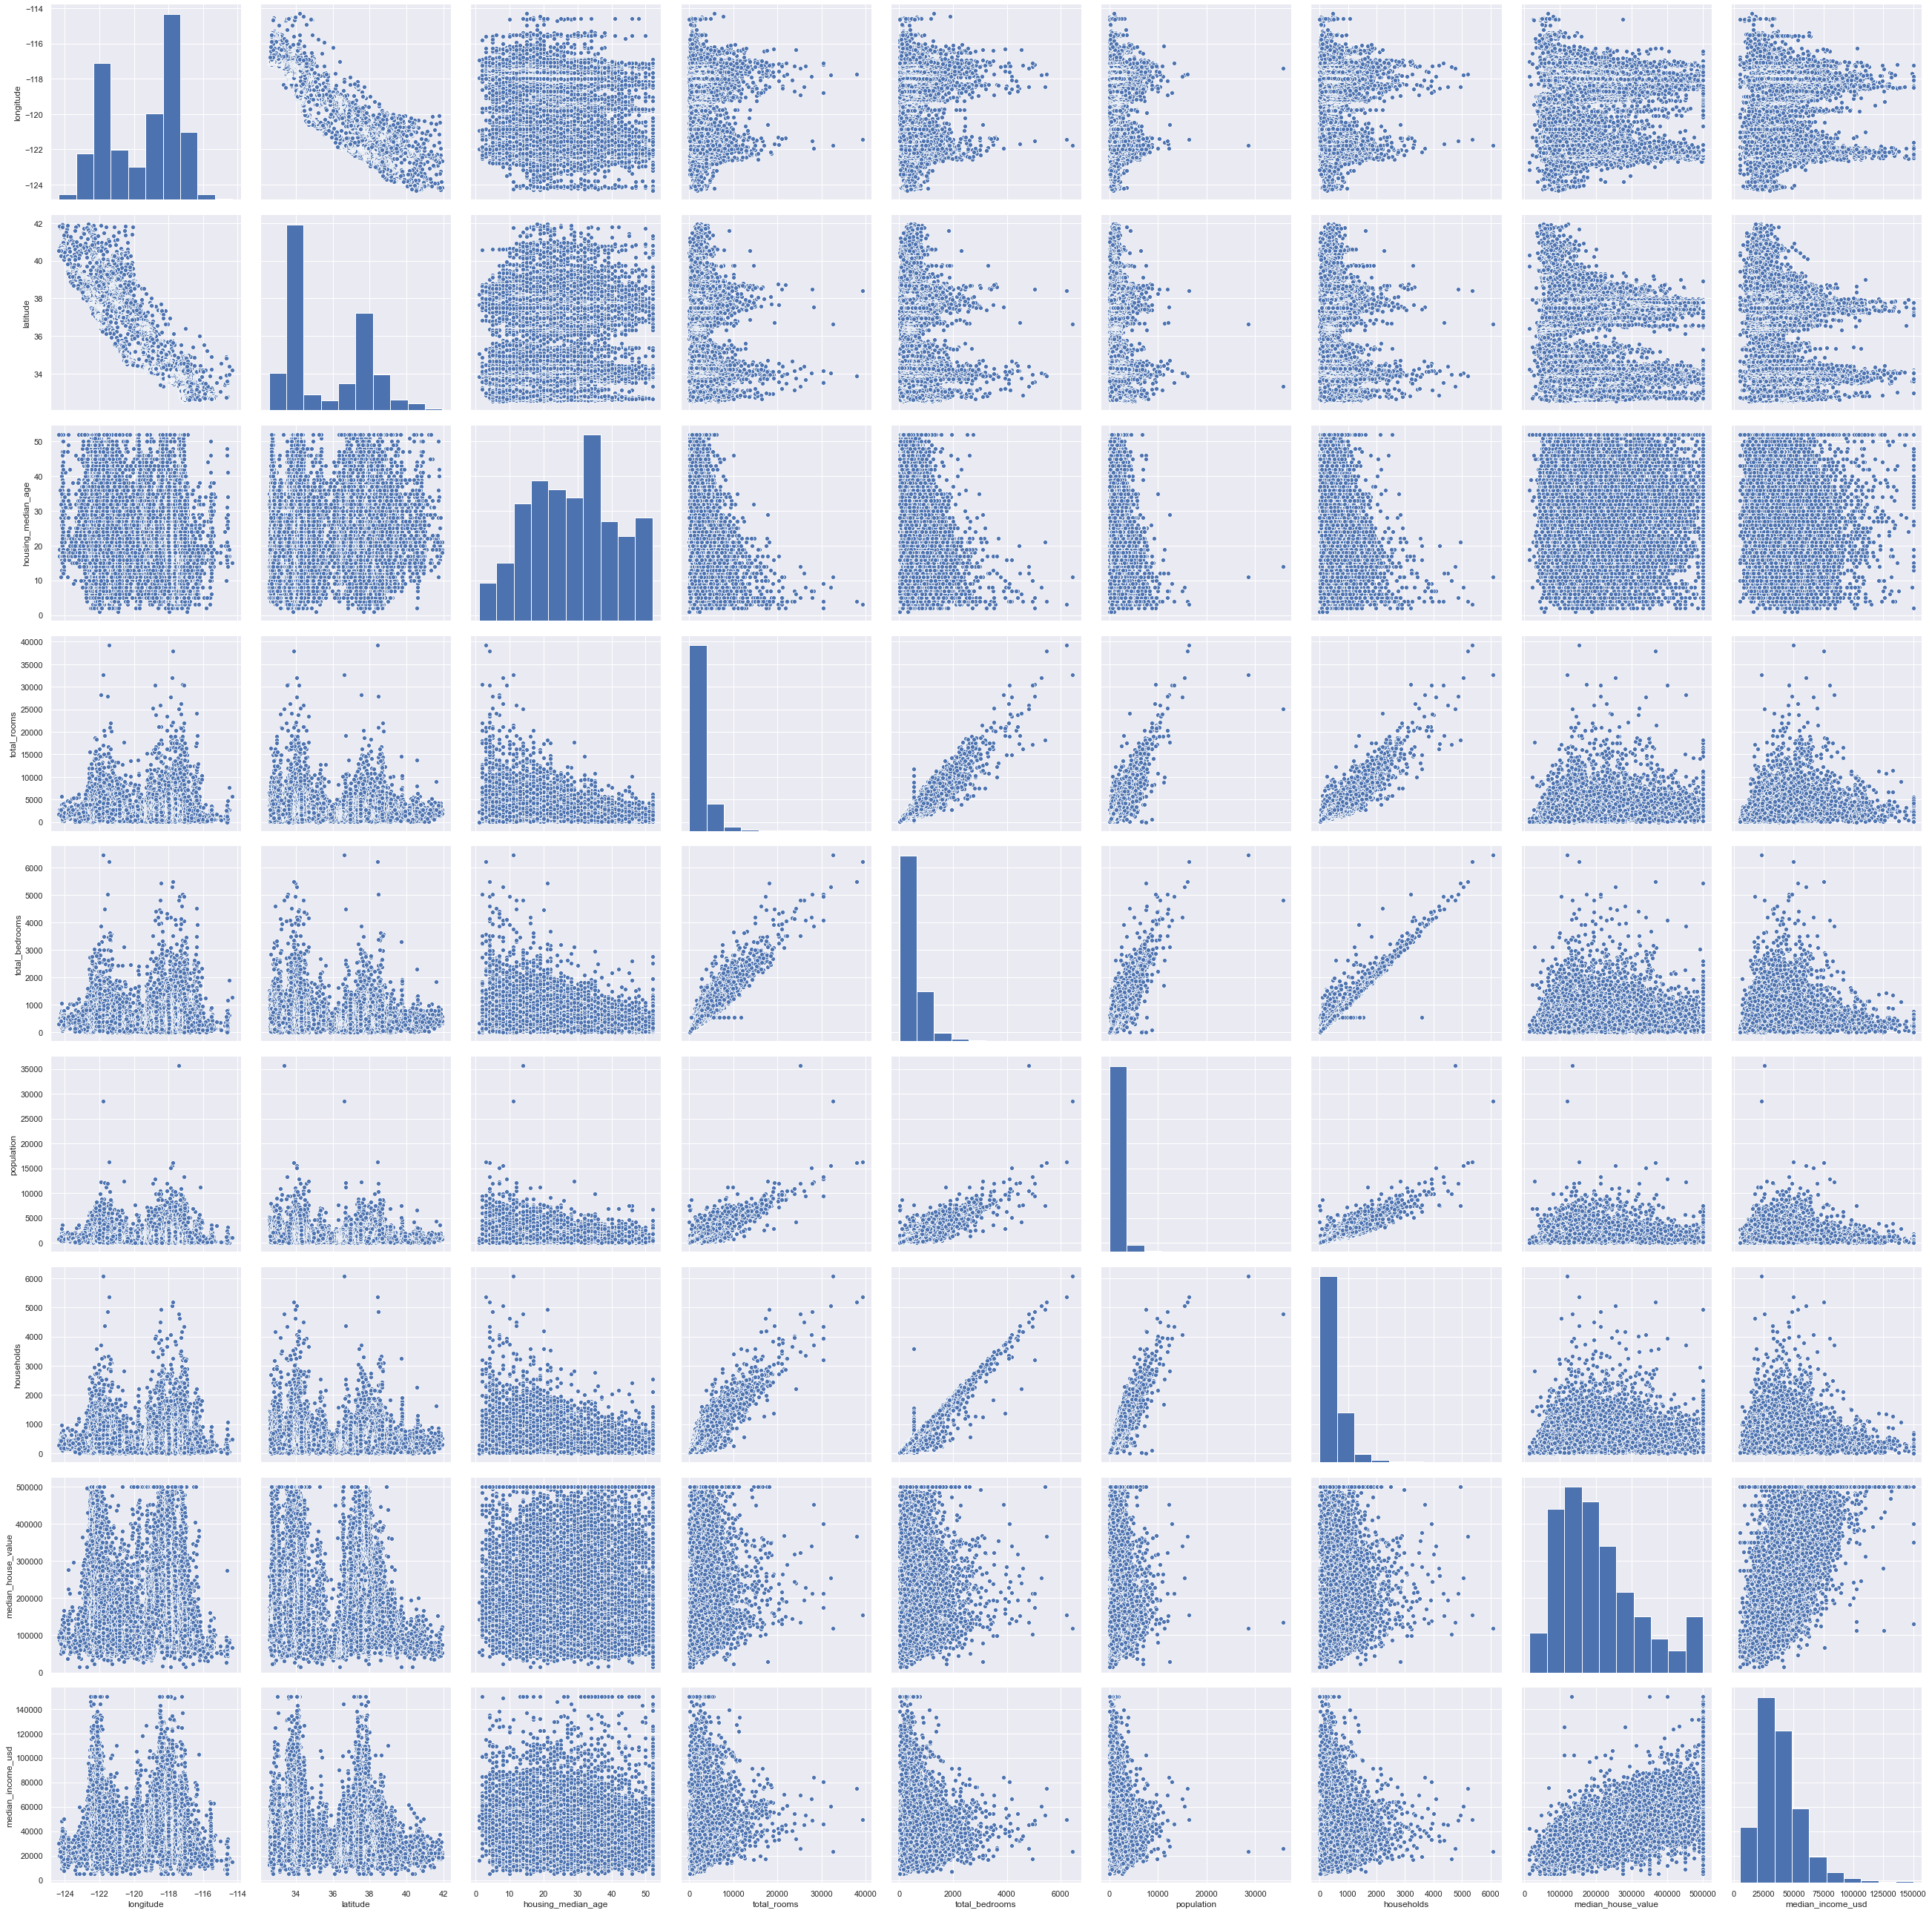

In [16]:
sns.pairplot(df_hs, height=4)
plt.ylim(0,)

Text(0.5, 1.0, 'Heatmap of correlation')

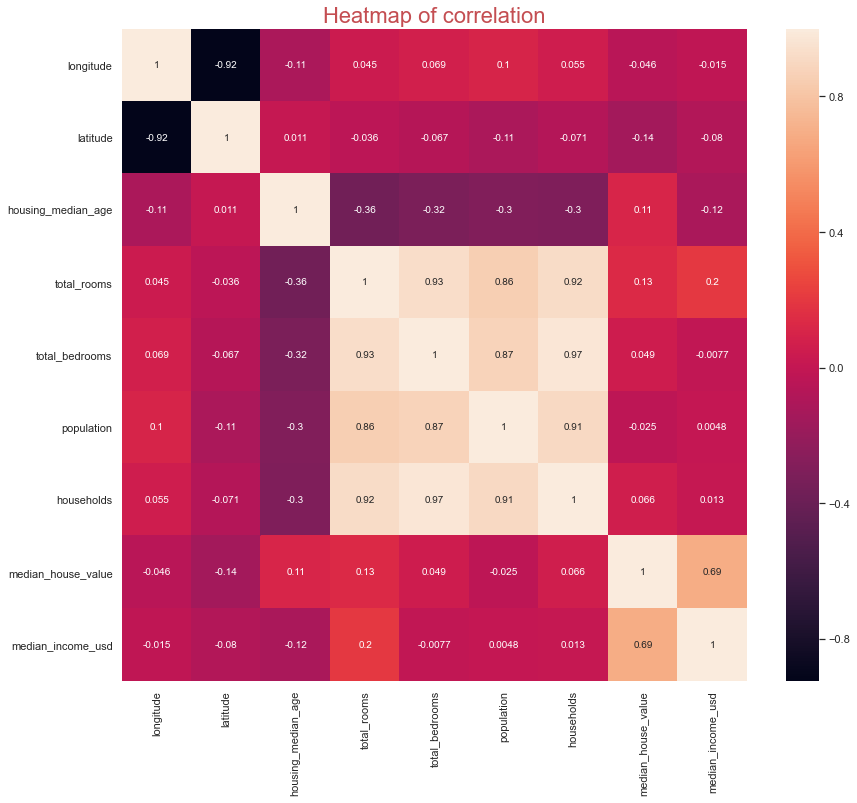

In [17]:
fig, ax= plt.subplots(figsize=(14,12))
sns.heatmap(corr_hs, annot=True)
plt.title('Heatmap of correlation', fontsize = 22, color='r') 




<p>The heatmap is plotted to visualize the correlation with the lighter color indicating strong correlation and the darker color indicating low correlation.</p>
<p>Tracing from median house prices on the map, it can be seen that the strongest correlation is with median income, with a pearson correlation coefficient of +0.688. This value is considered to be statistically significant with a p-value of 0.0.<o> 

In [18]:
#sort correlation value in descending order
corr_hs["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income_usd     0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<p> It can be seen that, median income shows the strongest person correlation value. Although correlation does not explain a cause and effect relationship, income might be a potential predictor for house price.<p/>

<h5>Scatter plot to visualize relationship between income and house value<h5/>

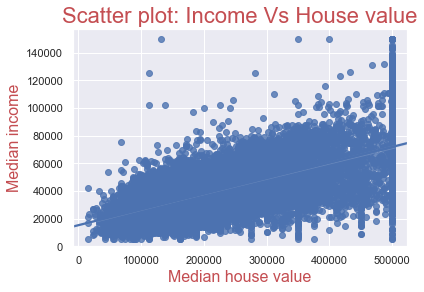

In [19]:
sns.regplot(x='median_house_value', y='median_income_usd', data= df_hs)
plt.ylim(0,)
plt.title('Scatter plot: Income Vs House value', fontsize = 22, color='r') #Title of map
plt.ylabel('Median income', fontsize = 16, color='r') 
plt.xlabel('Median house value', fontsize = 16, color='r')
plt.show()

<p>From the above visualization it can be seen only median income shows a positive correlation relationship with house value.<p/>

<h5>P-Value<h5/>
<p>Although correlation shows the relationship, the P- helps to assess statistical significance<P/>
<p> The P values of the various varibles are shown below<p/> 

In [20]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df_hs['median_house_value'], df_hs['median_income_usd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value =", p_value)  

The Pearson Correlation Coefficient is 0.6880752079585497  with a P-value = 0.0


The P-value of 0.0 shows that there is statistical significance of the correlation between Income and median house values.

<h5>ANOVA Analysis<5/>

In [21]:
anova_grp=df_hs[['median_house_value', 'ocean_proximity']].groupby(['ocean_proximity'])
#anova_grp.get_group('<1H OCEAN')['median_house_value']
f_val, p_val = stats.f_oneway(anova_grp.get_group('<1H OCEAN')['median_house_value'], anova_grp.get_group('INLAND')['median_house_value'], anova_grp.get_group('ISLAND')['median_house_value'],anova_grp.get_group('NEAR BAY')['median_house_value'],anova_grp.get_group('NEAR OCEAN')['median_house_value'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 1612.1407358838217 , P = 0.0


The large F value of 1612  indicates that there is a difference in Median house value depending on ocean proximity.
The p-value of 0.0 shows that the F-value is statistically significant

<h4>Regression Analysis<h4/>



<h5>Predicting House price using Income: Simple Linear Regression<h5/>

In [22]:
from sklearn.linear_model import LinearRegression   #import statistics library sklearn
lm=LinearRegression()                               #assign variable for regression function
X=df_hs[['median_income_usd']]                          #assign  independent variable
Y=df_hs['median_house_value']                       ##assign dependent variable                     


<h5>Fitting values into model<5/>

In [23]:
lm.fit(X,Y)     #fit into model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
Y_ext=lm.predict(X) # predict Y for value of X
Y_ext[0:10]

array([393027.73007889, 392033.03646789, 348400.25790111, 280932.44713449,
       205833.0795036 , 213798.98716148, 198013.45031793, 175482.38621318,
       132033.50058289, 199355.03287731])

<h5> Get value of intercept, coefficient<h5/>

In [25]:
lm.intercept_


45085.57670326781

In [26]:
lm.coef_

array([4.17938492])

<p>The formula for simple linear regression is given by<p/>

<p>Y= β0 + β1X </p>
<li>Y= dependent variable (Median house value)</li>
<li>β0= Intercept</li>
<li>β1= Slope</li>
<li>X= Independent variable</li>

<p>Applying the values into the formula<p>


<h5> Simple Regression model evaluation using R^2<h5/>

In [27]:
lm.fit(X,Y)
print('R-square :',lm.score(X,Y))

R-square : 0.47344749180719903


<p>This indicates that Median income explains only 47% of the variation in house prices.</p> 

<h5>Multiple Regression<h5/>

In [28]:
var=df_hs[['median_income_usd','total_rooms','housing_median_age', 'households','total_bedrooms' ]]

In [29]:
lm.fit(var, df_hs['median_house_value'] )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Get Intercept and coefficient

In [30]:
lm.intercept_

-55752.99623726556

In [31]:
lm.coef_

array([   4.90242428,  -24.68919787, 1917.89112978,   37.76778204,
        119.23510474])

In [35]:

Y_prd= lm.predict(var)

<h5>Multiple regression model evaluation using R^2<h5/>

In [32]:
lm.fit(var,Y)
print('R-square :',lm.score(var,Y))

R-square : 0.5444937326167745


<p>The new (R2.) value obtained from the multiple regression analysis is 0.54 which is although is higher than that of the simple linear regression is still explains less than 70% variation in house prices.</p>

<h5>Visualization multiple regression<h/5>

Text(0, 0.5, 'House prices')

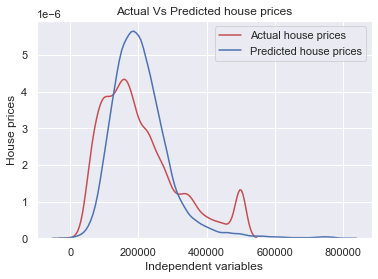

In [41]:
ax1 =sns.distplot(Y, hist= False, color= 'r', label= 'Actual house prices')
sns.distplot(Y_prd, hist= False, color ='b', label= 'Predicted house prices', ax= ax1)
plt.title('Actual Vs Predicted house prices')
plt.xlabel('Independent variables')
plt.ylabel('House prices')